In [6]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [7]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=aa62a38d747772428af78b8a8599f100c8c37e73ea41f9f067420ede4b8d0f33
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [8]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [9]:
min_mem_size=6
run_time=222

In [10]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [11]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:33225..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1hc0deuk
  JVM stdout: /tmp/tmp1hc0deuk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1hc0deuk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33225
Connecting to H2O server at http://127.0.0.1:33225 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_gxzta5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [84]:
# Import the data using H2O.ai
url = 'https://raw.githubusercontent.com/Somesh-Banerjee-neu/raw-csv-file/main/ball_by_ball_it20.csv'
data = h2o.import_file(path=url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [85]:
data.head()

C1,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,,,1,0,259,nan,119,South Africa,1,1,0,1,0,nan,nan,1,1
1,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,,,2,0,259,nan,118,South Africa,1,1,1,1,1,nan,nan,1,1
2,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,nan,117,South Africa,1,0,1,0,1,1,2,0,1
3,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,,,2,1,259,nan,116,South Africa,1,0,1,1,1,nan,nan,0,1
4,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,6,1,259,nan,115,South Africa,1,4,1,2,1,nan,nan,4,1
5,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,1,6,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,10,1,259,nan,114,South Africa,1,8,1,3,1,nan,nan,4,1
6,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,2,1,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,nan,113,South Africa,1,1,8,2,3,nan,nan,0,1
7,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,2,2,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,nan,112,South Africa,1,1,8,3,3,nan,nan,0,1
8,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,2,3,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,nan,111,South Africa,1,1,8,4,3,nan,nan,0,1
9,1.3396e+06,2023-03-26 00:00:00,SuperSport Park,West Indies,South Africa,1,2,4,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,nan,110,South Africa,1,1,8,5,3,nan,nan,0,1


In [86]:
data.types

{'C1': 'int',
 'Match ID': 'int',
 'Date': 'time',
 'Venue': 'enum',
 'Bat First': 'enum',
 'Bat Second': 'enum',
 'Innings': 'int',
 'Over': 'int',
 'Ball': 'int',
 'Batter': 'enum',
 'Non Striker': 'enum',
 'Bowler': 'enum',
 'Batter Runs': 'int',
 'Extra Runs': 'int',
 'Runs From Ball': 'int',
 'Ball Rebowled': 'int',
 'Extra Type': 'enum',
 'Wicket': 'int',
 'Method': 'enum',
 'Player Out': 'enum',
 'Innings Runs': 'int',
 'Innings Wickets': 'int',
 'Target Score': 'int',
 'Runs to Get': 'int',
 'Balls Remaining': 'int',
 'Winner': 'enum',
 'Chased Successfully': 'int',
 'Total Batter Runs': 'int',
 'Total Non Striker Runs': 'int',
 'Batter Balls Faced': 'int',
 'Non Striker Balls Faced': 'int',
 'Player Out Runs': 'int',
 'Player Out Balls Faced': 'int',
 'Bowler Runs Conceded': 'int',
 'Valid Ball': 'int'}

In [87]:
def count_null_values(data):

    # Check for missing values in each column
    missing_values_count = data.nacnt()

    # Create a dictionary to store column names and their corresponding null value counts
    null_values_dict = {}

    # Iterate through the columns of the H2OFrame
    for i, col_name in enumerate(data.columns):
        null_values_dict[col_name] = missing_values_count[i]

    return null_values_dict
# Call the function and pass your H2OFrame as an argument
null_values_count = count_null_values(data)

# Print the dictionary containing null value counts for each column
for key,value in null_values_count.items():
  print("{} : {}.".format(key.capitalize(), int(value)))


C1 : 0.
Match id : 0.
Date : 0.
Venue : 0.
Bat first : 0.
Bat second : 0.
Innings : 0.
Over : 0.
Ball : 0.
Batter : 0.
Non striker : 0.
Bowler : 0.
Batter runs : 0.
Extra runs : 0.
Runs from ball : 0.
Ball rebowled : 0.
Extra type : 0.
Wicket : 0.
Method : 401460.
Player out : 401460.
Innings runs : 0.
Innings wickets : 0.
Target score : 0.
Runs to get : 224815.
Balls remaining : 0.
Winner : 0.
Chased successfully : 0.
Total batter runs : 0.
Total non striker runs : 0.
Batter balls faced : 0.
Non striker balls faced : 0.
Player out runs : 401460.
Player out balls faced : 401460.
Bowler runs conceded : 0.
Valid ball : 0.


In [88]:
# Compute Overs for each Match innings
data_pd = data.as_data_frame()

data_pd['overs'] = data_pd['Over'].astype(int) + (data_pd['Ball'].astype(int) - 1) / 6

# Compute Runs in last 5 overs & Wickets in last 5 overs
for index, row in data_pd.iterrows():
    if row['Balls Remaining'] < 89:
        data_pd.at[index, 'runs_last_5_overs'] = row['Innings Runs'] - data_pd.at[index - 30, 'Innings Runs']
        data_pd.at[index, 'wickets_last_5_overs'] = row['Innings Wickets'] - data_pd.at[index - 30, 'Innings Wickets']
    else:
        data_pd.at[index, 'runs_last_5_overs'] = row['Innings Runs']
        data_pd.at[index, 'wickets_last_5_overs'] = row['Innings Wickets']

# Convert back to H2OFrame if necessary
data = h2o.H2OFrame(data_pd)

# Print the modified H2OFrame
data



Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C1,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,overs,runs_last_5_overs,wickets_last_5_overs
0,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,,,1,0,259,,119,South Africa,1,1,0,1,0,nan,nan,1,1,1,1,0
1,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,,,2,0,259,,118,South Africa,1,1,1,1,1,nan,nan,1,1,1.16667,2,0
2,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,,117,South Africa,1,0,1,0,1,1,2,0,1,1.33333,2,1
3,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,,,2,1,259,,116,South Africa,1,0,1,1,1,nan,nan,0,1,1.5,2,1
4,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,6,1,259,,115,South Africa,1,4,1,2,1,nan,nan,4,1,1.66667,6,1
5,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,6,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,10,1,259,,114,South Africa,1,8,1,3,1,nan,nan,4,1,1.83333,10,1
6,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,1,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,113,South Africa,1,1,8,2,3,nan,nan,0,1,2,10,1
7,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,2,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,112,South Africa,1,1,8,3,3,nan,nan,0,1,2.16667,10,1
8,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,3,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,111,South Africa,1,1,8,4,3,nan,nan,0,1,2.33333,10,1
9,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,4,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,110,South Africa,1,1,8,5,3,nan,nan,0,1,2.5,10,1


In [89]:
import pandas as pd
from h2o.exceptions import H2OValueError


def remove_irrelevant_columns(df, irrelevant_columns):
    print(f'Before Removing Irrelevant Columns : {df.shape}')
    try:
        df = df.drop(irrelevant_columns, axis=1)  # Drop Irrelevant Columns
    except H2OValueError as e:
        print(f"Warning: {e}")  # Print warning if column does not exist
    print(f'After Removing Irrelevant Columns : {df.shape}')
    return df

irrelevant = ['Unnamed: 0', 'Match ID', 'Date', 'Venue','Innings', 'Batter', 'Non Striker', 'Bowler', 'Over', 'Ball',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball']  # Provide the correct column names here
result_df = remove_irrelevant_columns(data, irrelevant)
print(result_df.head(124))
data = result_df



Before Removing Irrelevant Columns : (425119, 38)
After Removing Irrelevant Columns : (425119, 38)
  C1    Match ID         Date  Venue            Bat First    Bat Second      Innings    Over    Ball  Batter      Non Striker    Bowler        Batter Runs    Extra Runs    Runs From Ball    Ball Rebowled  Extra Type      Wicket  Method    Player Out      Innings Runs    Innings Wickets    Target Score  Runs to Get      Balls Remaining  Winner          Chased Successfully    Total Batter Runs    Total Non Striker Runs    Batter Balls Faced    Non Striker Balls Faced    Player Out Runs    Player Out Balls Faced    Bowler Runs Conceded    Valid Ball     overs    runs_last_5_overs    wickets_last_5_overs
   0  1.3396e+06  1.67979e+12  SuperSport Park  West Indies  South Africa          1       1       1  BA King     KR Mayers      WD Parnell              1             0                 1                0  []                   0                                       1                  0       

In [90]:
# Define Consistent Teams
const_teams = ['Afghanistan', 'Australia', 'Bangladesh',
               'England', 'India', 'Ireland', 'New Zealand', 'Pakistan',
               'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwe']

In [91]:
print(f'Before Removing Inconsistent Teams : {data.shape}')

# Remove the Non-Consistent Teams
data = data[(data['Bat First'].isin(const_teams)) & (data['Bat Second'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')

print(f"Consistent Teams : \n{data['Bat First'].unique()}")

data.head()

Before Removing Inconsistent Teams : (425119, 38)
After Removing Irrelevant Columns : (201431, 38)
Consistent Teams : 
C1
Afghanistan
Australia
Bangladesh
England
India
Ireland
New Zealand
Pakistan
South Africa
Sri Lanka
[12 rows x 1 column]



C1,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,overs,runs_last_5_overs,wickets_last_5_overs
0,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,,,1,0,259,,119,South Africa,1,1,0,1,0,nan,nan,1,1,1,1,0
1,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,,,2,0,259,,118,South Africa,1,1,1,1,1,nan,nan,1,1,1.16667,2,0
2,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,,117,South Africa,1,0,1,0,1,1,2,0,1,1.33333,2,1
3,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,,,2,1,259,,116,South Africa,1,0,1,1,1,nan,nan,0,1,1.5,2,1
4,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,6,1,259,,115,South Africa,1,4,1,2,1,nan,nan,4,1,1.66667,6,1
5,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,1,6,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,,,10,1,259,,114,South Africa,1,8,1,3,1,nan,nan,4,1,1.83333,10,1
6,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,1,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,113,South Africa,1,1,8,2,3,nan,nan,0,1,2,10,1
7,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,2,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,112,South Africa,1,1,8,3,3,nan,nan,0,1,2.16667,10,1
8,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,3,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,111,South Africa,1,1,8,4,3,nan,nan,0,1,2.33333,10,1
9,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,2,4,KR Mayers,J Charles,AK Markram,0,0,0,0,[],0,,,10,1,259,,110,South Africa,1,1,8,5,3,nan,nan,0,1,2.5,10,1


In [92]:
print(f'Before Removing Overs : {data.shape}')

data = data[data['overs'] >= 5.0]
print(f'After Removing Overs : {data.shape}')

data.head()

Before Removing Overs : (201431, 38)
After Removing Overs : (158466, 38)


C1,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,overs,runs_last_5_overs,wickets_last_5_overs
25,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,1,J Charles,KR Mayers,M Jansen,6,0,6,0,[],0,,,39,1,259,,95,South Africa,1,30,7,14,9,nan,nan,6,1,5,39,1
26,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,2,J Charles,KR Mayers,M Jansen,4,0,4,0,[],0,,,43,1,259,,94,South Africa,1,34,7,15,9,nan,nan,4,1,5.16667,43,1
27,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,3,J Charles,KR Mayers,M Jansen,0,0,0,0,[],0,,,43,1,259,,93,South Africa,1,34,7,16,9,nan,nan,0,1,5.33333,43,1
28,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,4,J Charles,KR Mayers,M Jansen,6,0,6,0,[],0,,,49,1,259,,92,South Africa,1,40,7,17,9,nan,nan,6,1,5.5,49,1
29,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,5,J Charles,KR Mayers,M Jansen,0,0,0,0,[],0,,,49,1,259,,91,South Africa,1,40,7,18,9,nan,nan,0,1,5.66667,49,1
30,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,6,J Charles,KR Mayers,M Jansen,4,0,4,0,[],0,,,53,1,259,,90,South Africa,1,44,7,19,9,nan,nan,4,1,5.83333,53,1
31,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,1,KR Mayers,J Charles,K Rabada,4,0,4,0,[],0,,,57,1,259,,89,South Africa,1,11,44,10,19,nan,nan,4,1,6,57,1
32,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,2,KR Mayers,J Charles,K Rabada,4,0,4,0,[],0,,,61,1,259,,88,South Africa,1,15,44,11,19,nan,nan,4,1,6.16667,59,0
33,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,3,KR Mayers,J Charles,K Rabada,0,1,1,0,['legbyes'],0,,,62,1,259,,87,South Africa,1,15,44,12,19,nan,nan,0,1,6.33333,60,0
34,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,4,J Charles,KR Mayers,K Rabada,0,0,0,0,[],0,,,62,1,259,,86,South Africa,1,44,15,20,12,nan,nan,0,1,6.5,56,0


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


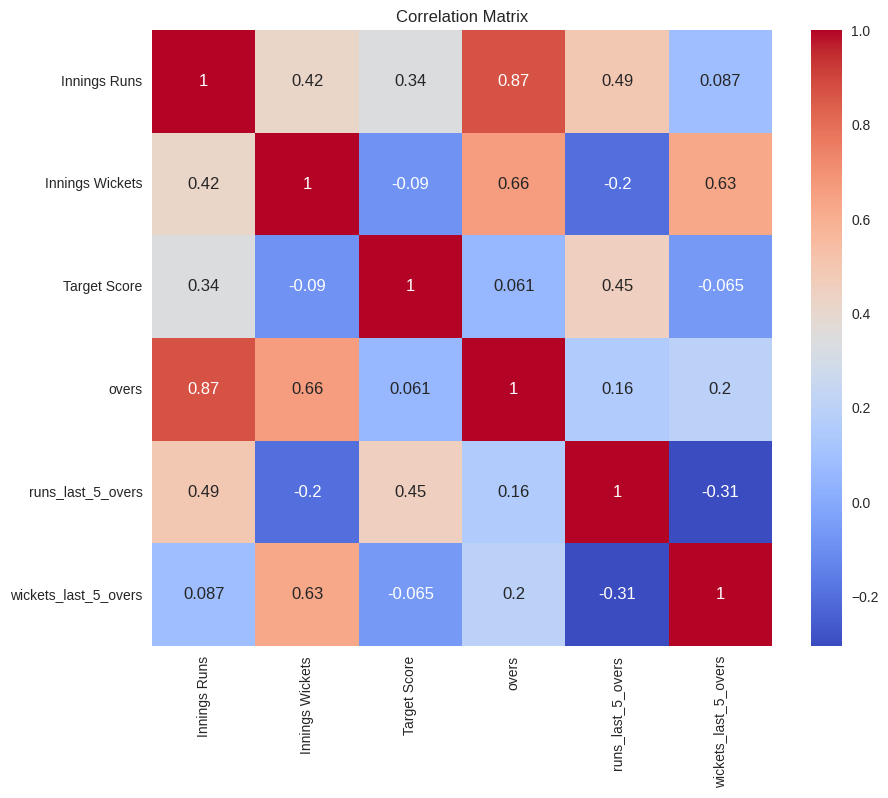

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns by name
numerical_columns = ['Innings Runs','Innings Wickets','Target Score','overs','runs_last_5_overs','wickets_last_5_overs']  # Add the names of your numerical columns here

# Select numerical data from H2OFrame
numerical_data = data[:, numerical_columns]

# Convert the selected numerical data to Pandas DataFrame
numerical_data_pd = numerical_data.as_data_frame()

# Create a correlation matrix
correlation_matrix = numerical_data_pd.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |███████████████████████████

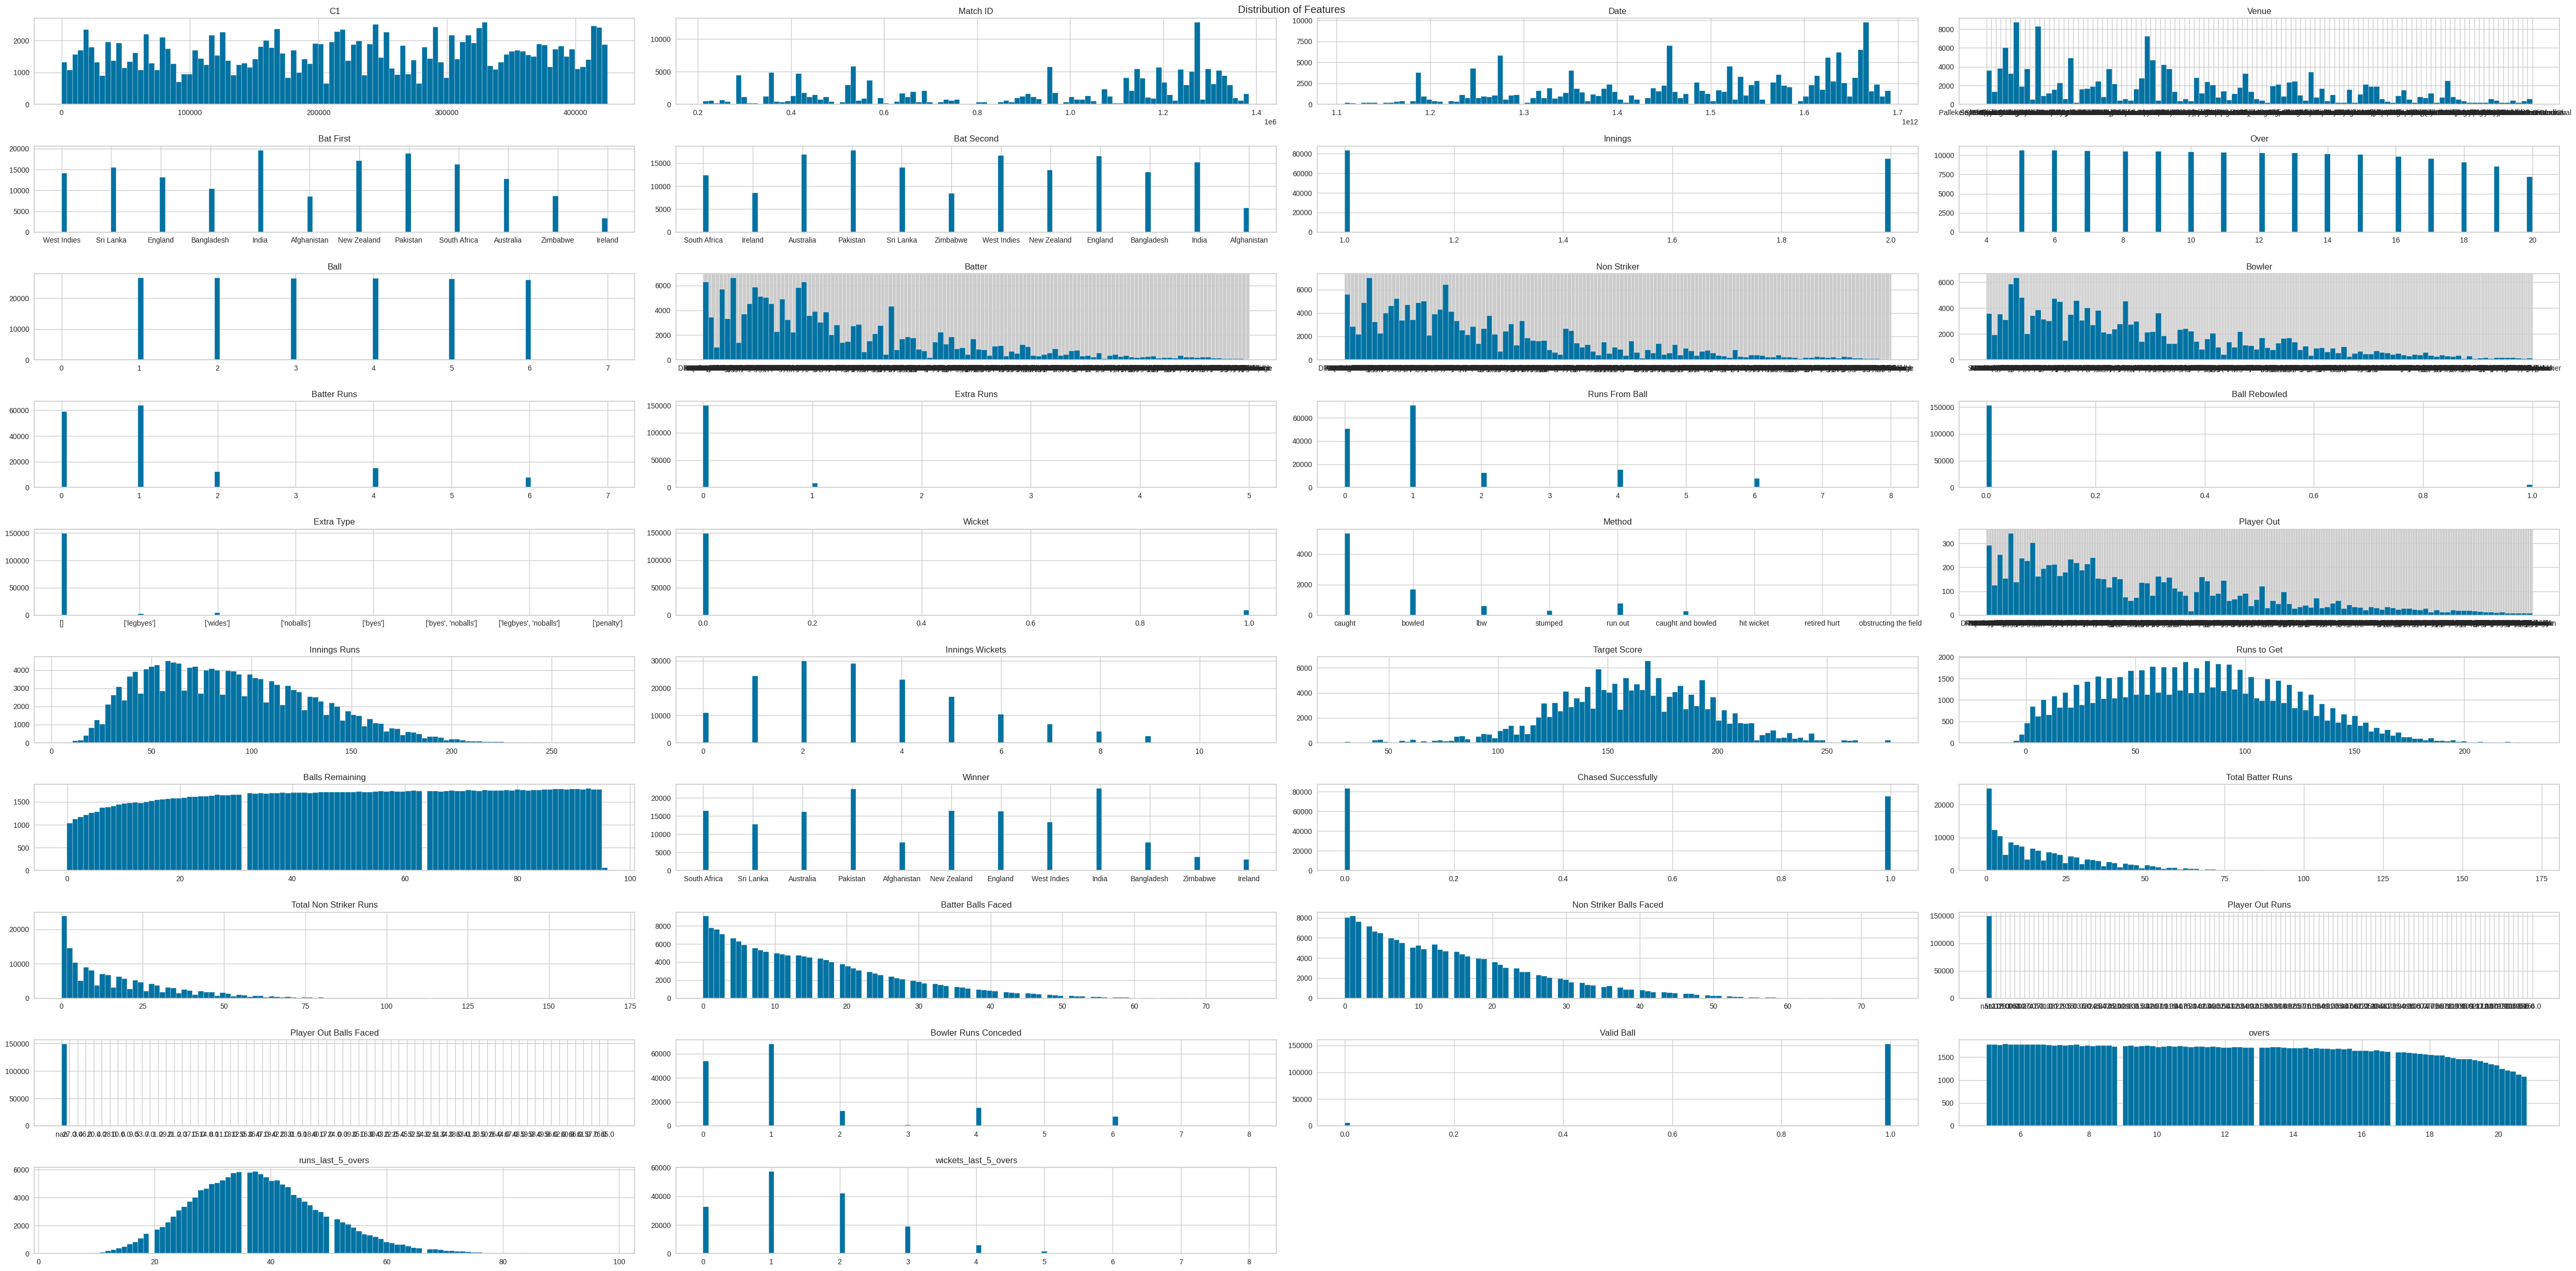

In [94]:
import matplotlib.pyplot as plt
import math

# Get column names
columns = data.columns

# Calculate the number of rows and columns for subplots
num_features = len(columns)
num_cols = 4  # Set the number of columns per row
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 25))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over each column and plot histogram
for i, column in enumerate(columns):
    ax = axes[i]
    # Drop missing values and plot histogram
    column_data = data[column].as_data_frame().dropna()
    ax.hist(column_data, bins=100)
    ax.set_title(column)

# Hide empty subplots
for j in range(num_features, num_rows * num_cols):
    axes[j].axis('off')

# Set suptitle and adjust layout
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()


In [95]:
import h2o
import pandas as pd

# Assuming you have pandas_df already defined as a Pandas DataFrame
# Convert Pandas DataFrame to H2OFrame
df = h2o.H2OFrame(data)


In [96]:
df.types

{'C1': 'int',
 'Match ID': 'int',
 'Date': 'int',
 'Venue': 'enum',
 'Bat First': 'enum',
 'Bat Second': 'enum',
 'Innings': 'int',
 'Over': 'int',
 'Ball': 'int',
 'Batter': 'enum',
 'Non Striker': 'enum',
 'Bowler': 'enum',
 'Batter Runs': 'int',
 'Extra Runs': 'int',
 'Runs From Ball': 'int',
 'Ball Rebowled': 'int',
 'Extra Type': 'enum',
 'Wicket': 'int',
 'Method': 'enum',
 'Player Out': 'enum',
 'Innings Runs': 'int',
 'Innings Wickets': 'int',
 'Target Score': 'int',
 'Runs to Get': 'enum',
 'Balls Remaining': 'int',
 'Winner': 'enum',
 'Chased Successfully': 'int',
 'Total Batter Runs': 'int',
 'Total Non Striker Runs': 'int',
 'Batter Balls Faced': 'int',
 'Non Striker Balls Faced': 'int',
 'Player Out Runs': 'enum',
 'Player Out Balls Faced': 'enum',
 'Bowler Runs Conceded': 'int',
 'Valid Ball': 'int',
 'overs': 'real',
 'runs_last_5_overs': 'int',
 'wickets_last_5_overs': 'int'}

In [97]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [98]:
print(df_train.shape)
print(df_test.shape)

(126580, 38)
(31886, 38)


In [99]:
df_train.head()

C1,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,overs,runs_last_5_overs,wickets_last_5_overs
25,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,1,J Charles,KR Mayers,M Jansen,6,0,6,0,[],0,,,39,1,259,,95,South Africa,1,30,7,14,9,nan,nan,6,1,5,39,1
26,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,2,J Charles,KR Mayers,M Jansen,4,0,4,0,[],0,,,43,1,259,,94,South Africa,1,34,7,15,9,nan,nan,4,1,5.16667,43,1
27,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,3,J Charles,KR Mayers,M Jansen,0,0,0,0,[],0,,,43,1,259,,93,South Africa,1,34,7,16,9,nan,nan,0,1,5.33333,43,1
28,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,4,J Charles,KR Mayers,M Jansen,6,0,6,0,[],0,,,49,1,259,,92,South Africa,1,40,7,17,9,nan,nan,6,1,5.5,49,1
29,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,5,J Charles,KR Mayers,M Jansen,0,0,0,0,[],0,,,49,1,259,,91,South Africa,1,40,7,18,9,nan,nan,0,1,5.66667,49,1
30,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,5,6,J Charles,KR Mayers,M Jansen,4,0,4,0,[],0,,,53,1,259,,90,South Africa,1,44,7,19,9,nan,nan,4,1,5.83333,53,1
31,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,1,KR Mayers,J Charles,K Rabada,4,0,4,0,[],0,,,57,1,259,,89,South Africa,1,11,44,10,19,nan,nan,4,1,6,57,1
32,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,2,KR Mayers,J Charles,K Rabada,4,0,4,0,[],0,,,61,1,259,,88,South Africa,1,15,44,11,19,nan,nan,4,1,6.16667,59,0
33,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,3,KR Mayers,J Charles,K Rabada,0,1,1,0,['legbyes'],0,,,62,1,259,,87,South Africa,1,15,44,12,19,nan,nan,0,1,6.33333,60,0
34,1.3396e+06,1.67979e+12,SuperSport Park,West Indies,South Africa,1,6,4,J Charles,KR Mayers,K Rabada,0,0,0,0,[],0,,,62,1,259,,86,South Africa,1,44,15,20,12,nan,nan,0,1,6.5,56,0


In [100]:
X = df.columns
print(X)

['C1', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second', 'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs', 'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner', 'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs', 'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


In [101]:
# Set target and predictor variables
y = "Target Score"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['C1', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second', 'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs', 'Innings Wickets', 'Runs to Get', 'Balls Remaining', 'Winner', 'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs', 'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


In [102]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [103]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),3/8
# GBM base models (used / total),1/4
# XGBoost base models (used / total),1/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


In [104]:
print(
    aml.leaderboard
)

model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20240219_235500      2.71859    7.39075   1.78637  0.0212641                   7.39075
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_235500   2.71859    7.39075   1.78637  0.0212641                   7.39075
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_235500   2.78592    7.76132   1.85715  0.0215651                   7.76132
GBM_1_AutoML_2_20240219_235500                            2.88782    8.33951   1.89026  0.0222673                   8.33951
XGBoost_1_AutoML_2_20240219_235500                        5.50921   30.3514    3.99928  0.0421798                  30.3514
DRF_1_AutoML_2_20240219_235500                            6.10238   37.239     2.39156  0.0456597                  37.239
GBM_3_AutoML_2_20240219_235500                           12.5674   157.938     9.30067  0.0983393                 157.938
GBM_2_AutoML_

In [105]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_1_AutoML_2_20240219_235500': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_235500': 1,
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_235500': 2,
 'GBM_1_AutoML_2_20240219_235500': 3,
 'GLM_1_AutoML_2_20240219_235500': 10}

In [106]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

3


In [107]:
best_model.algo

'gbm'

In [108]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

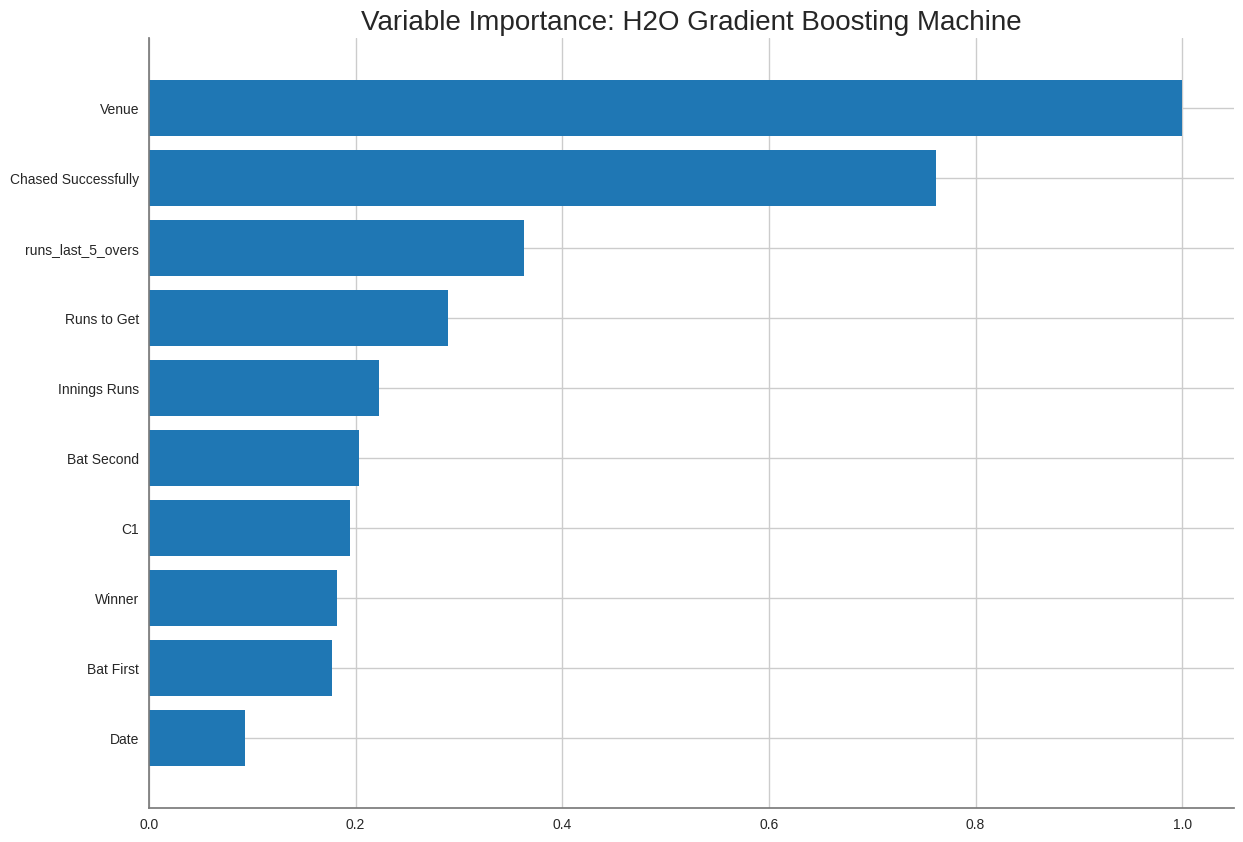

<Figure size 800x550 with 0 Axes>

In [109]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

10
glm


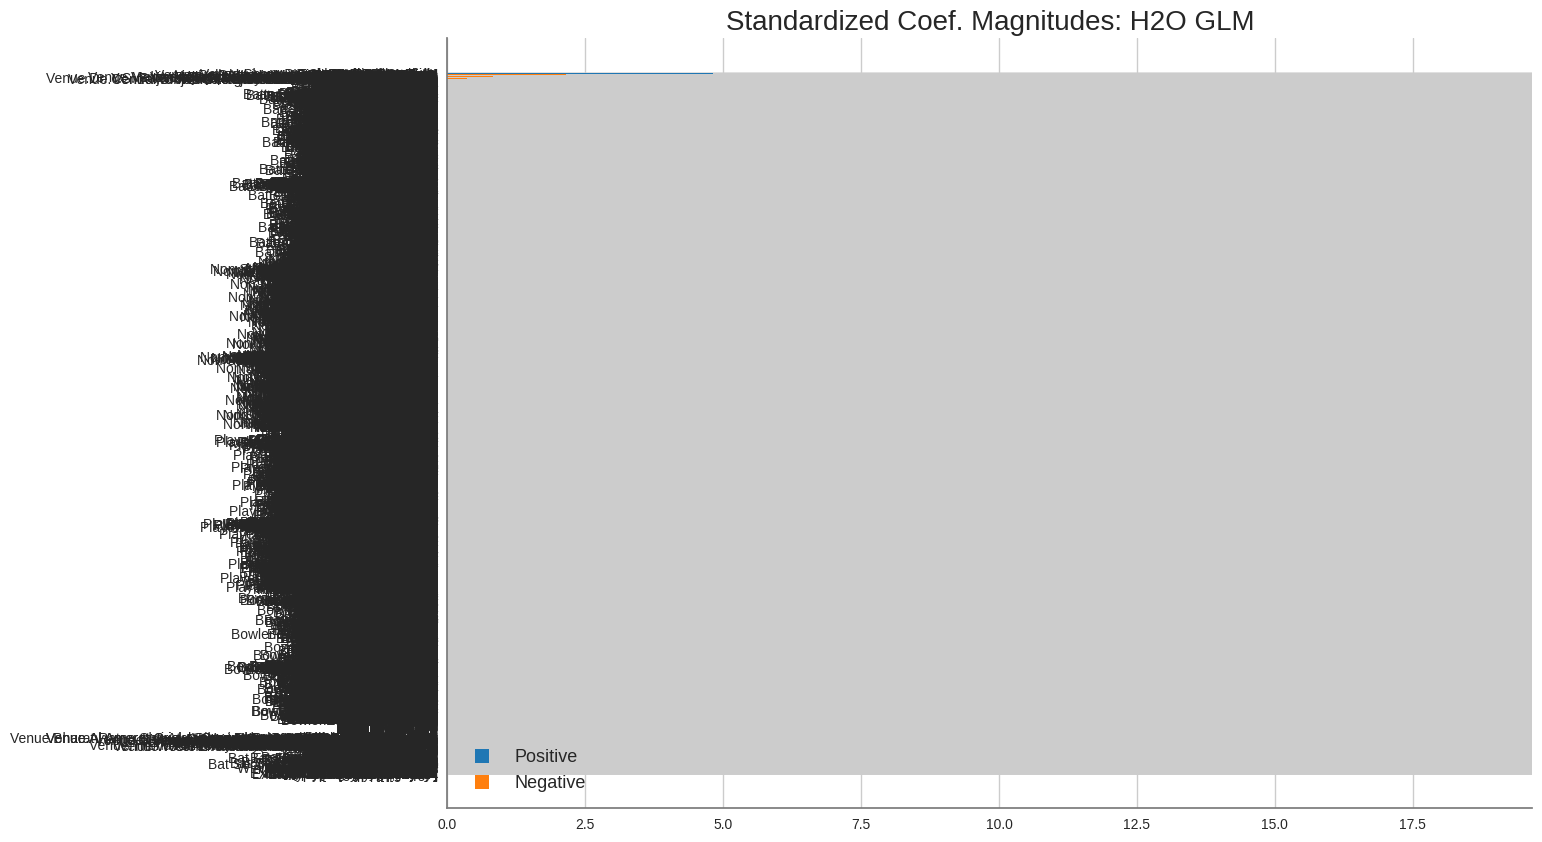

In [110]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [112]:
print(best_model.rmse(train=True))

1.6613343954267217


In [114]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [115]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 8.18871287797481,
 'rmse': 2.8615927169977926,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [116]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [117]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
          predict
0      257.699722
1      259.537066
2      258.745465
3      258.505892
4      258.115856
...           ...
31881  179.287906
31882  179.970256
31883  181.254884
31884  182.047822
31885  179.648849

[31886 rows x 1 columns]


In [118]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,Target Score
0,259
1,259
2,259
3,259
4,259
...,...
31881,181
31882,181
31883,181
31884,181


In [119]:
print(X)

['C1', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second', 'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs', 'Innings Wickets', 'Runs to Get', 'Balls Remaining', 'Winner', 'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs', 'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


In [120]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [121]:
# wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████ (failed)


OSError: Job with key $03017f000001ca81ffffffff$_be77eee0d6554477d05fef61b82749b3 failed with an exception: hex.gram.Gram$NonSPDMatrixException
stacktrace: 
hex.gram.Gram$NonSPDMatrixException
	at hex.gram.Gram$Cholesky.solve(Gram.java:735)
	at hex.gram.Gram$Cholesky$1.compute(Gram.java:678)
	at jsr166y.RecursiveAction.exec(RecursiveAction.java:160)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinTask.doInvoke(ForkJoinTask.java:360)
	at jsr166y.ForkJoinTask.invokeAll(ForkJoinTask.java:741)
	at hex.gram.Gram$Cholesky.solve(Gram.java:682)
	at hex.gram.Gram$Cholesky.getInv(Gram.java:688)
	at hex.glm.GLM$GLMDriver.fitModel(GLM.java:3082)
	at hex.glm.GLM$GLMDriver.computeSubmodel(GLM.java:3503)
	at hex.glm.GLM$GLMDriver.doCompute(GLM.java:3653)
	at hex.glm.GLM$GLMDriver.computeImpl(GLM.java:3538)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at hex.glm.GLM$GLMDriver.compute2(GLM.java:1573)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1689)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [122]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 1.5694 ),11593,3923,5,py_142_sid_a687
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,22.552319,0.0752214,22.584892,22.507265,22.538157,22.468208,22.663076
mean_residual_deviance,857.0281,6.697542,856.1336,854.3188,855.17664,851.0099,868.5016
mse,857.0281,6.697542,856.1336,854.3188,855.17664,851.0099,868.5016
null_deviance,30351434.0000000,364577.47,30559100.0000000,29816744.0000000,30273934.0000000,30314092.0000000,30793302.0000000
r2,0.2850552,0.0013002,0.2868031,0.2837675,0.2848495,0.2859214,0.2839346
residual_deviance,21696666.0000000,249361.45,21794592.0000000,21354552.0000000,21649652.0000000,21645436.0000000,22039096.0000000
rmse,29.274864,0.1141567,29.25976,29.228733,29.243402,29.172073,29.47035
rmsle,0.2067846,0.0006189,0.2067431,0.2074747,0.2068962,0.2057910,0.2070179


In [123]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 1.5694 ),11593,7,2,py_142_sid_a687
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,19.642097,0.0935099,19.495499,19.681202,19.604496,19.711824,19.717464
mean_residual_deviance,683.23645,7.3687787,676.386,688.14105,678.13007,679.8608,693.66437
mse,683.23645,7.3687787,676.386,688.14105,678.13007,679.8608,693.66437
null_deviance,30350696.0000000,144075.8,30303942.0000000,30504618.0000000,30383800.0000000,30432582.0000000,30128542.0000000
r2,0.4300812,0.0053812,0.4290728,0.4269583,0.4343275,0.43662,0.4234274
residual_deviance,17295994.0000000,135263.45,17301276.0000000,17478094.0000000,17187206.0000000,17144728.0000000,17368662.0000000
rmse,26.138489,0.1407774,26.007421,26.232443,26.04093,26.07414,26.33751
rmsle,0.1870868,0.0017795,0.1869511,0.1867917,0.1857692,0.1858049,0.1901171


In [124]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [125]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708375843858_33


GLM Model: summary
    family    link      regularization                               lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.3139 )  nlambda = 100, lambda.max = 31.387, lambda.min = 0.3139, lambda.1se = -1.0  11593                         54                             100                     py_142_sid_a687

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 630.098120423613
RMSE: 25.101755325546716
MAE: 18.6623408358247
RMSLE: 0.18132186321315943
Mean Residual Deviance: 630.098120423613
R^2: 0.4744132578784144
Null degrees of freedom: 126579
Residual degrees of freedom: 126525
Null deviance: 151750060.8201613
Residual deviance: 79757820.08322093
AIC: 1175249.406686664

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse       training_deviance    training_mae      training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  ------------------  -------------------  ----------------  ------------------
     2024-02-20 00:16:38  0.000 sec   1            .31E2     1             1198.8470597263533  0.5
     2024-02-20 00:16:38  0.095 sec   2            .3E2      3             1196.0744217833517  0.5
     2024-02-20 00:16:38  0.155 sec   3            .29E2     3             1193.1907985996345  0.5
     2024-02-20 00:16:38  0.227 sec   4            .27E2     3             1190.1999300894079  0.5
     2024-02-20 00:16:39  0.292 sec   5            .26E2     3             1187.0991942686499  0.5
     2024-02-20 00:16:39  0.350 sec   6            .25E2     3             1183.886028224726   0.5
     2024-02-20 00:16:39  0.437 sec   7            .24E2     3             1180.5579420677047  0.5
     2024-02-20 00:16:39  0.495 sec   8            .23E2     4             1176.67773239072    0.5
     2024-02-20 00:16:39  0.534 sec   9            .22E2     4             1172.2183228676986  0.5
     2024-02-20 00:16:39  0.574 sec   10           .21E2     4             1167.6212909765202  0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                 ---                  ---               ---
     2024-02-20 00:16:44  5.649 sec   91           .48E0     45            657.9359515915891   0.5
     2024-02-20 00:16:44  5.836 sec   92           .46E0     46            654.5942641373739   0.5
     2024-02-20 00:16:44  5.898 sec   93           .43E0     47            651.319625049742    0.5
     2024-02-20 00:16:44  6.093 sec   94           .41E0     47            648.1129110257534   0.5
     2024-02-20 00:16:44  6.156 sec   95           .4E0      48            644.9748157946754   0.5
     2024-02-20 00:16:45  6.404 sec   96           .38E0     50            641.8806631635236   0.5
     2024-02-20 00:16:45  6.476 sec   97           .36E0     52            638.848699515652    0.5
     2024-02-20 00:16:45  6.672 sec   98           .34E0     52            635.8821315975622   0.5
     2024-02-20 00:16:45  6.851 sec   99           .33E0     54            632.9656948718138   0.5
     2024-02-20 00:16:45  7.073 sec   100          .31E0     55            630.0981204236283   0.5      100           25.101755325546716  630.098120423613     18.6623408358247  0.4744132578784144
[100 rows x 13 columns]


Variable Importances: 
variable    

In [127]:
coeff_table = wine_glm_regularization_ridge._model_json["output"]["coefficients_table"]

In [128]:
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,131.544054,161.972448
1,Batter.A Ahmadhel,0.000000,0.000000
2,Batter.A Amado,0.000000,0.000000
3,Batter.A Andrews,0.000000,0.000000
4,Batter.A Ashokan,0.000000,0.000000
...,...,...,...
11589,Bowler Runs Conceded,0.234156,0.368296
11590,Valid Ball,-0.753983,-0.138246
11591,overs,-0.078019,-0.351478
11592,runs_last_5_overs,0.403665,4.588913


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240219_235500,2.674,7.1503,1.76193,0.0200353,7.1503,4159,0.139374,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_235500,2.674,7.1503,1.76193,0.0200353,7.1503,1906,0.099701,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_235500,2.74764,7.54951,1.8367,0.0205476,7.54951,7417,0.098318,StackedEnsemble
GBM_1_AutoML_2_20240219_235500,2.86159,8.18871,1.86964,0.0212228,8.18871,76973,0.131546,GBM
XGBoost_1_AutoML_2_20240219_235500,5.42539,29.4348,3.93171,0.0411043,29.4348,66060,0.016112,XGBoost
DRF_1_AutoML_2_20240219_235500,6.11106,37.3451,2.38211,0.0422457,37.3451,5501,0.002666,DRF
GBM_3_AutoML_2_20240219_235500,12.4091,153.986,9.17861,0.0953965,153.986,4430,0.006812,GBM
GBM_2_AutoML_2_20240219_235500,13.5855,184.565,9.95161,0.103948,184.565,4352,0.007754,GBM
XGBoost_2_AutoML_2_20240219_235500,14.3538,206.031,10.8143,0.097971,206.031,4712,0.002057,XGBoost
GBM_4_AutoML_2_20240219_235500,18.3353,336.184,14.2564,0.136154,336.184,4460,0.003877,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

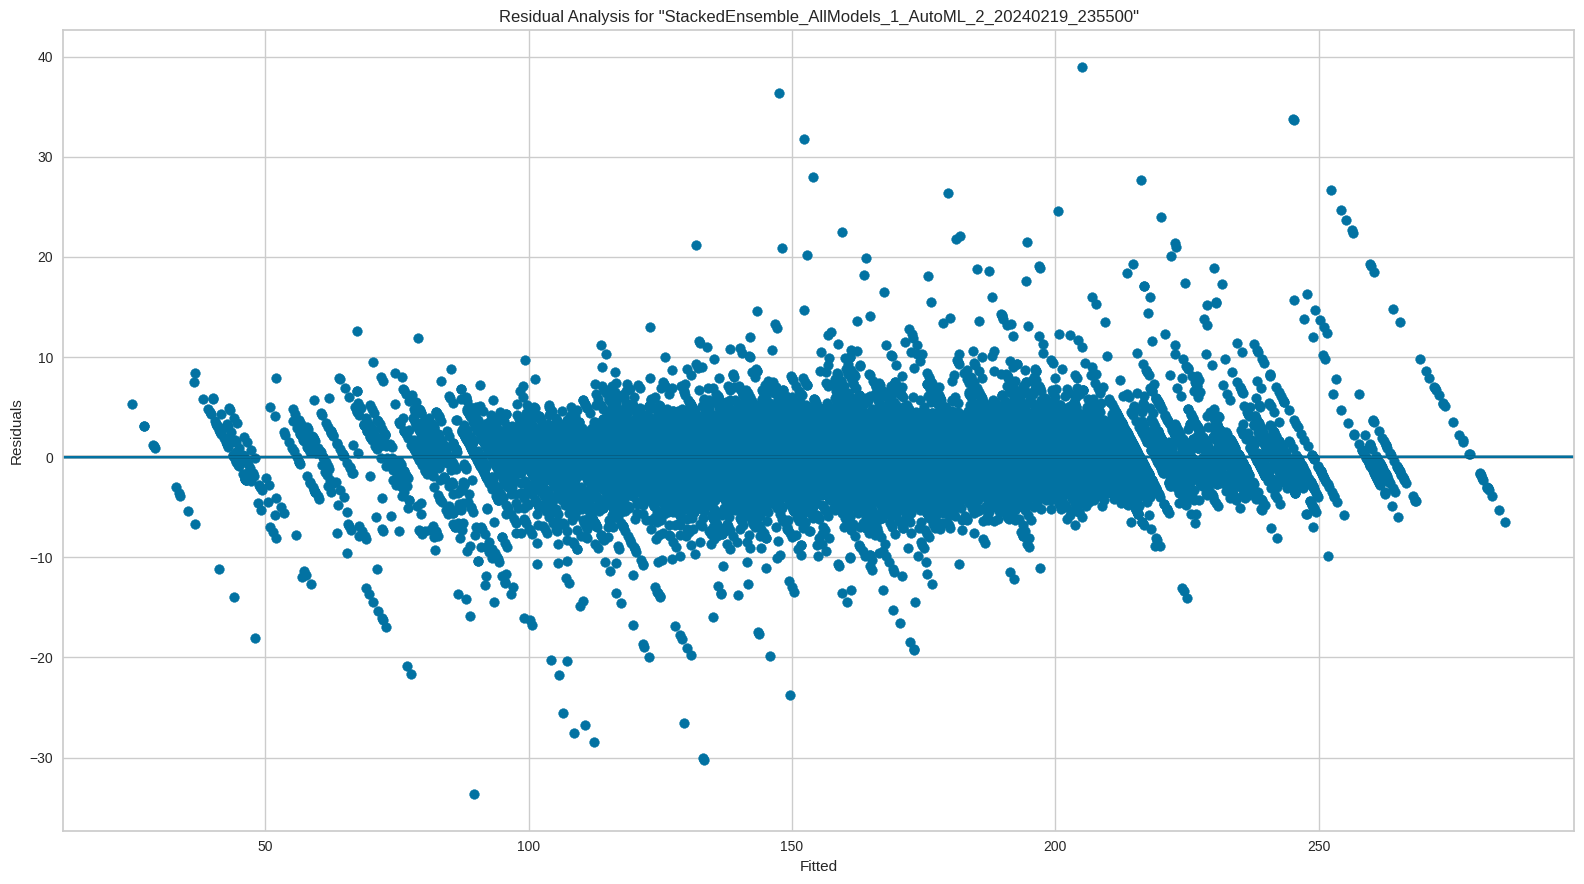

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

TypeError: 'NoneType' object is not iterable

In [129]:
exa = aml.explain(df_test)

In [135]:
import h2o

# Convert pandas DataFrame to H2OFrame
data_h2o = h2o.H2OFrame(data)

# Split the H2OFrame into train, validate, and test sets
train, validate, test = data_h2o.split_frame(ratios=[0.6, 0.2], seed=42)

# Summary of the split
print("Train set rows:", train.nrows)
print("Validate set rows:", validate.nrows)
print("Test set rows:", test.nrows)


Train set rows: 95297
Validate set rows: 31559
Test set rows: 31610


In [130]:
# # Assignment Questions

In [131]:
# Q1) Is the relationship significant?
#Yes the relationship is significant
# Q2) Are any model assumptions violated?
#The assumptions for linear regression include a linear relationship, homoscedasticity, no or little multicollinearity, and no autocorrelation. In this model:
# Linear relationship: The relationship between the independent variables and the dependent variable appears to be linear.
# Homoscedasticity: The plot for residuals indicates that the errors have a constant variance.
# Q3) Is there any multicollinearity in the model?
#Yes, multicollinearity exists between the 'Innings Runs' and 'Innings Wickets' variables
# Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
# The predictor variables are mostly independent of each other,
# Q5) In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.
# Q6) Does the model make sense?
# The model seems to make sense based on the assumptions tested and the significance of the predictor variables. For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

# Q7) Does regularization help?
# Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

# Q8) Which independent variables are significant?
# Independent variables with p-values less than 0.05 are considered significant.
# Q9) Which hyperparameters are important?
# To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 500, 'min_samples_split': 2 and 'n_estimators': 100



In [134]:
# # LICENSE
# MIT License
#
# Copyright (c) 2022 Somesh Banerjee
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# # REFERENCES
# H20.ai- https://docs.h2o.ai/
# OLS Model- http://net-informations.com/ds/mla/ols.html
# Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
# Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
# Kaggle Notebook- https://www.kaggle.com/datasets/jamiewelsh2/ball-by-ball-it20/data
# Dataset- https://www.kaggle.com/datasets/jamiewelsh2/ball-by-ball-it20/data
# Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

# In[ ]:
